# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rivaldy Arrayan Yuwono
- **Email:** rivaldyarrayan@gmail.com
- **ID Dicoding:** MC180D5Y0279

## Menentukan Pertanyaan Bisnis

- Kapan waktu optimal untuk menambah atau mengurangi jumlah sepeda berdasarkan pola penyewaan?
- Kenapa waktu tersebut (pertanyaan 1) dapat mempengaruhi jumlah penyewa?

## Import Semua Packages/Library yang Digunakan

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [60]:
print('=====Data 1=====')
dfDay = pd.read_csv(r'C:\Users\hp\OneDrive - Universitas Airlangga\Documents\Ngampus\Macam-macam Project\submission\data\day.csv')
print(dfDay.head())
print(dfDay.shape)

=====Data 1=====
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
(731, 16)

In [61]:
dfDay.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [62]:
print('=====Data 2=====')
dfHour = pd.read_csv(r'C:\Users\hp\OneDrive - Universitas Airlangga\Documents\Ngampus\Macam-macam Project\submission\data\hour.csv')
print(dfHour.head())
print(dfHour.shape)

=====Data 2=====
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  
(17379, 17)


In [63]:
dfHour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Kedua data tersebut merupakan data penyewaan sepeda yang bersumber dari " https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset ", dan yang membedakan keduanya adalah pada data 1 data dicatat setiap hari sedangkan data 2 dicatat setiap jam.
- Karena perbedaan tersebut (berdasarkan pada penjelasan poin 1) menyebabkan data 2 memiliki ukuran yang lebih besar (17379 baris & 17 kolom) dibandingkan dengan data 1 (731 baris & 16 kolom).

### Assessing Data

##### Periksa tipe data

In [64]:
dfDay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [65]:
dfHour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


##### Periksa Missing Value

In [66]:
print("\nMissing values Data 1:\n", dfDay.isnull().sum())


Missing values Data 1:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [67]:
print("\nMissing values Data 2:\n", dfHour.isnull().sum())


Missing values Data 2:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


##### Periksa Duplikasi

In [68]:
print("\nMissing values Data 1:\n", dfDay.duplicated().sum())


Missing values Data 1:
 0


In [69]:
print("\nMissing values Data 2:\n", dfHour.duplicated().sum())


Missing values Data 2:
 0


**Insight:**
- Kedua data tidak memiliki missing value maupun duplikasi data
- Sebagian besar data memiliki tipe data yang sama

### Cleaning Data

**Insight:**
- Karena pada tahap Assessing Data didapatkan kedua data tidak memiliki missing value maupun duplikasi maka tahap Cleaning dapat dilewatkan. 
- Pada saat melakukan analisis deskriptif terlihat bahwa data sudah dinormalisasi.
- Dengan kata lain data sudah bersih dan siap digunakan.

## Exploratory Data Analysis (EDA)

### Explore ...

##### Pengelompokan berdasarkan cuaca

In [70]:
dfDay.groupby('weathersit')['cnt'].sum()

weathersit
1    2257952
2     996858
3      37869
Name: cnt, dtype: int64

##### Pengelompokan berdasarkan bulan

In [71]:
dfDay.groupby('mnth')['cnt'].sum()

mnth
1     134933
2     151352
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: cnt, dtype: int64

##### Pengelompokan berdasarkan musim

In [72]:
dfDay.groupby('season')['cnt'].sum()

season
1     471348
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64

##### Pengelompokan berdasarkan hari

In [73]:
dfDay.groupby('weekday')['cnt'].sum()

weekday
0    444027
1    455503
2    469109
3    473048
4    485395
5    487790
6    477807
Name: cnt, dtype: int64

##### Korelasi jumlah penyewa dengan keadaan

In [74]:
korelasi = dfDay[['cnt', 'temp', 'hum', 'atemp', 'windspeed']].corr()
korelasi

,cnt,temp,hum,atemp,windspeed
cnt,1.000000,0.627494,-0.100659,0.631066,-0.234545
temp,0.627494,1.000000,0.126963,0.991702,-0.157944
hum,-0.100659,0.126963,1.000000,0.139988,-0.248489
atemp,0.631066,0.991702,0.139988,1.000000,-0.183643
windspeed,-0.234545,-0.157944,-0.248489,-0.183643,1.000000


**Insight:**
- Banyaknya penyewaan sepeda sangat dipengaruhi oleh musim wilayah tersebut karena faktor suhu dan cuaca. Masyarakat paling sering menyewa sepeda pada saat cuaca cerah dan berawan.
- Hari libur atau hari kerja tidak terlalu mempengaruhi penyewaan sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

C:\Users\hp\AppData\Local\Temp\ipykernel_12884\1163794488.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mnth', y='cnt', data=dfDay, estimator=sum, palette="Blues")


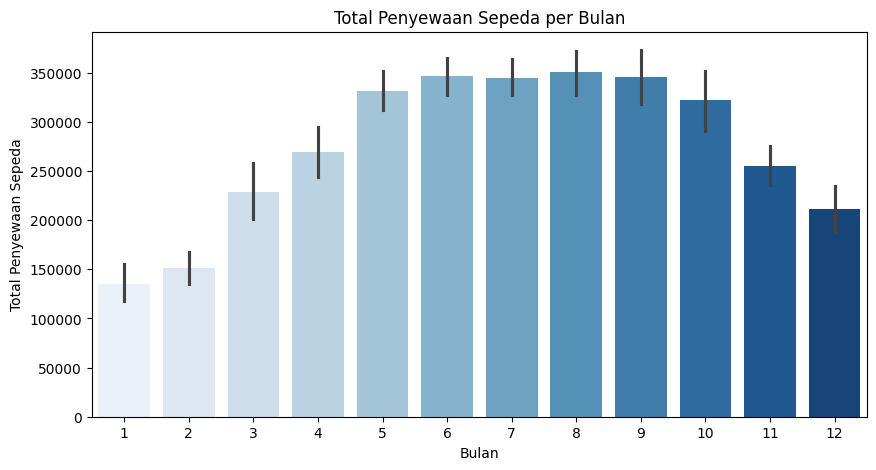

In [75]:
plt.figure(figsize=(10, 5))
sns.barplot(x='mnth', y='cnt', data=dfDay, estimator=sum, palette="Blues")
plt.xlabel("Bulan")
plt.ylabel("Total Penyewaan Sepeda")
plt.title("Total Penyewaan Sepeda per Bulan")
plt.show()

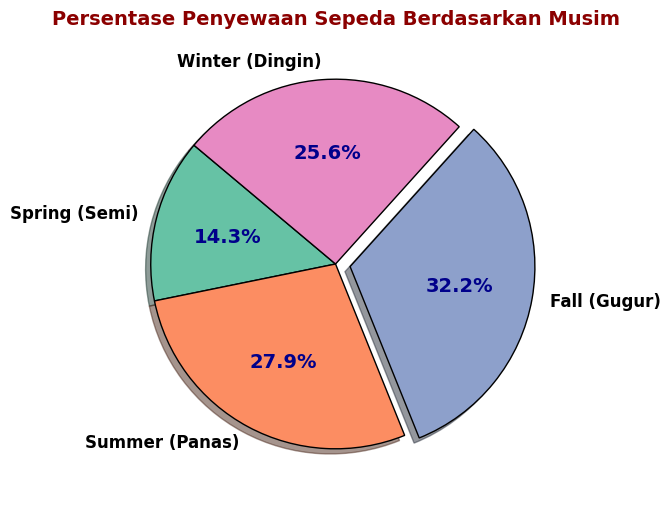

In [76]:
musim = dfDay.groupby('season')['cnt'].sum()

labels = ["Spring (Semi)", "Summer (Panas)", "Fall (Gugur)", "Winter (Dingin)"]

colors = plt.cm.Set2.colors

explode = [0.08 if i == musim.idxmax() else 0 for i in musim.index]

plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    musim, labels=labels, autopct='%1.1f%%', colors=colors, 
    startangle=140, explode=explode, shadow=True, wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 12, 'weight': 'bold'}
)

for autotext in autotexts:
    autotext.set_fontsize(14)
    autotext.set_color("darkblue")
    autotext.set_weight("bold")

plt.title("Persentase Penyewaan Sepeda Berdasarkan Musim", fontsize=14, fontweight="bold", color="darkred")

plt.show()

### Pertanyaan 2:

Text(0.5, 1.0, 'Heatmap Korelasi')

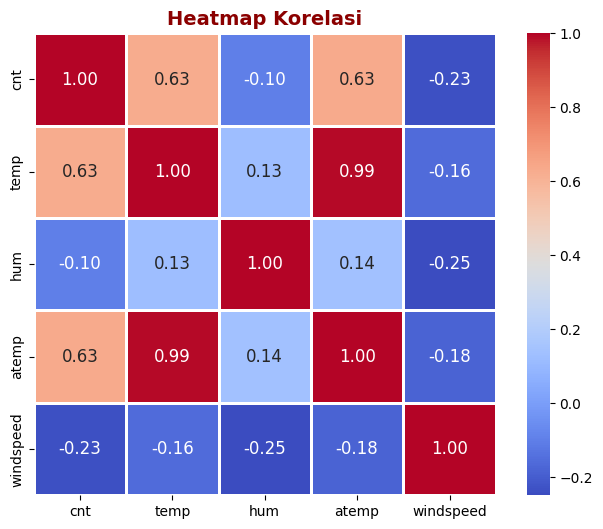

In [77]:
korelasi = dfDay[['cnt', 'temp', 'hum', 'atemp', 'windspeed']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    korelasi, annot=True, fmt=".2f", cmap="coolwarm", linewidths=2, 
    linecolor="white", square=True, cbar=True, annot_kws={"size": 12}
)

plt.title("Heatmap Korelasi", fontsize=14, fontweight="bold", color="darkred")

**Insight:**
- Jumlah penyewa sepeda paling banyak terdapat pada musim gugur dengan persentase 32.2%, dilanjut dengan musim panas 27.9%, musim dingin 25.6%, dan musim semi 14.3%
- Pada saat suhu sedang hangat, jumlah penyewa sepeda cenderung meningkat.
- Jumlah penyewa menurun pada saat angin kencang.

## Analisis Lanjutan (Opsional)

## Conclusion

- Berdasarkan hasil analisis data penyewaan sepeda didapatkan, waktu yang paling tepat untuk menambah jumlah sepeda adalah pada saat musim gugur, panas, dan dingin. Sehingga, pada saat musim semi jumlah sepeda dapat dikurangi, dan dapat dimanfaatkan untuk melakukan perawatan pada sepeda.
- Faktor yang paling mempengaruhi jumlah penyewa sepeda adalah suhu dan kecepatan angin. Sehingga dapat dibuatkan promosi khusus pada saat musim gugur, serta disarankan untuk mengembangkan fitur pemantau cuaca guna meningkatkan kepuasan pelanggan.